In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import data_processing 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

from sklearn.inspection import PartialDependenceDisplay
import shap
from sklearn.inspection import permutation_importance
import importlib

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
import models
importlib.reload(models)

<module 'models' from '/home/robin/uu/hcml/HCML_Project/models.py'>

In [21]:
x_train, x_test, y_train, y_test = data_processing.get_data()

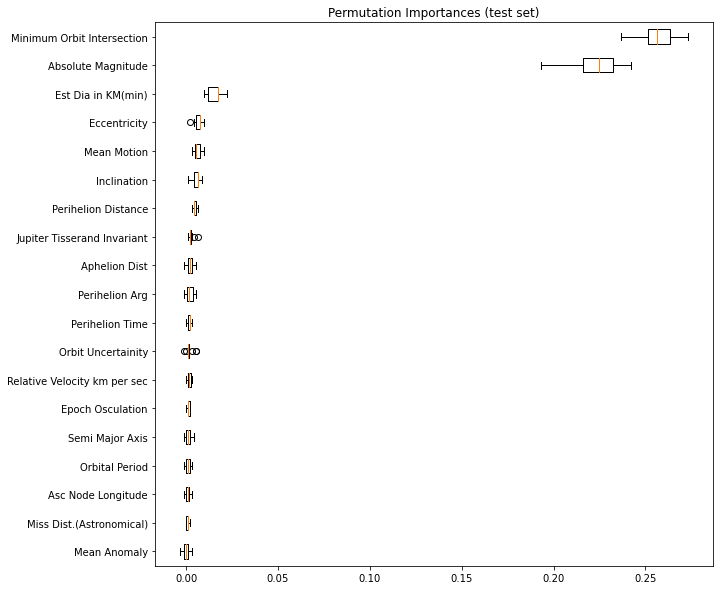

In [28]:
nn = models.nn_model()
nn.fit(x_train, y_train)
# PFI
pfi = permutation_importance(nn, x_test, y_test, n_repeats=12, random_state=42)
sorted_idx = pfi.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(pfi.importances[sorted_idx].T, vert=False, labels=np.array(x_train.columns)[sorted_idx])
ax.set_title("Permutation Importances (test set)")
#plt.savefig(f"{plot_folder}/nn_pfi.png")
fig.set_size_inches(10, 10)


In [31]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show, preserve

ebm = ExplainableBoostingClassifier().fit(x_train, y_train)
y_pred = ebm.predict(x_test)

show(ebm.explain_global())


<!-- http://127.0.0.1:7085/140225319011536/ -->

In [111]:
df

,feature,EBM,NN
17,Mean Anomaly,0.012992,-0.000089
3,Miss Dist.(Astronomical),0.005974,0.000800
11,Asc Node Longitude,0.035200,0.000888
12,Orbital Period,0.003313,0.000977
9,Semi Major Axis,0.004203,0.001155
7,Epoch Osculation,0.000000,0.001244
2,Relative Velocity km per sec,0.014714,0.001688
4,Orbit Uncertainity,0.095053,0.001688
16,Perihelion Time,0.014622,0.001777
14,Perihelion Arg,0.012989,0.001866


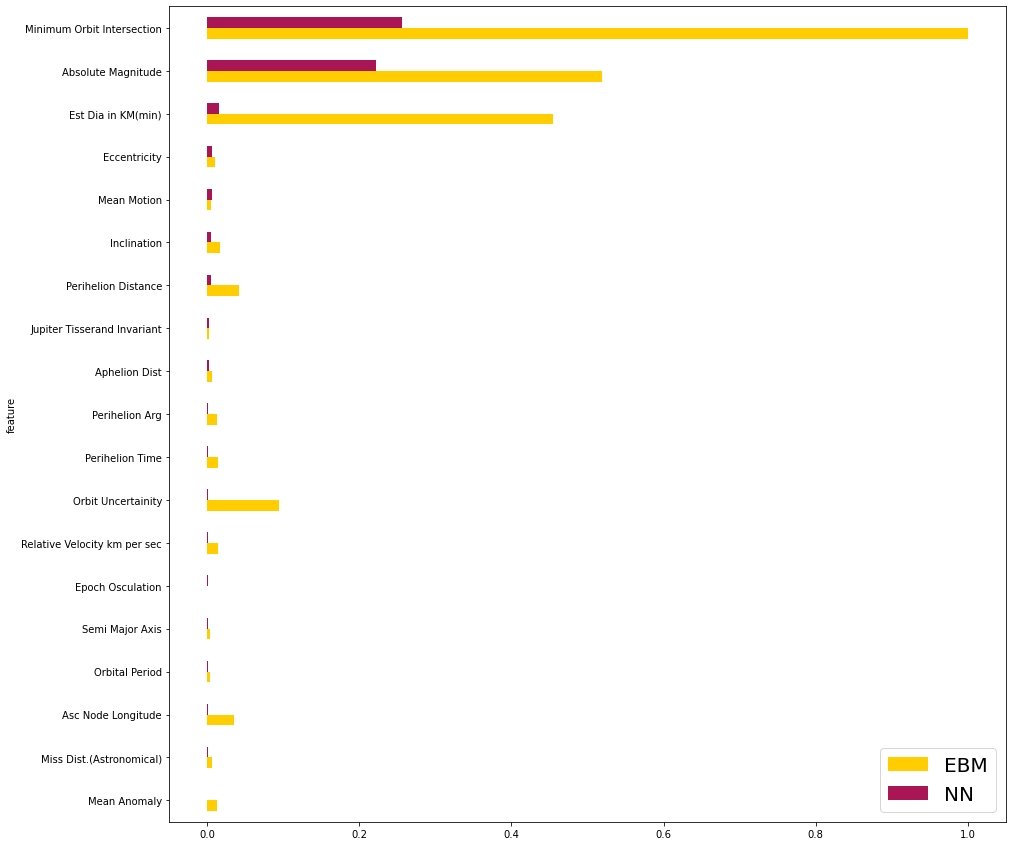

In [109]:

ebm_values = data_processing.normalize_data(ebm.term_importances()[0:len(x_train.columns)])
df = pd.DataFrame({"feature" : x_train.columns, "EBM": ebm_values,"NN": list(pfi.importances_mean), }, )
df.sort_values(by=["NN"], inplace = True)
fig, ax = plt.subplots()
df.plot.barh(x = 'feature', y = ['EBM', 'NN'], color={"EBM": "#FFCD00", "NN": "#AA1555"}, ax = ax)
fig.set_size_inches(15, 15)
plt.legend(fontsize=20)